In [8]:
from picaso import justdoit as jdi 
from picaso import justplotit as jpi

jpi.output_notebook()


from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter

filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
filters[3].wavelength

Loading BokehJS ...

array([ 200. ,  200.5,  201. , ..., 1100.5, 1101. , 1101.5])

In [63]:
directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)


directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar3000-Rstar0.2-Teq84-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec2 = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)


spec

,wavelength [um],planet flux [ergs/cm2/s/cm],star flux [ergs/cm2/s/cm],albedo,planet-star contrast
0,1.999633,8.629159e+02,4.464766e+13,0.000021,1.932724e-11
1,1.998634,5.288725e+02,4.450758e+13,0.000013,1.188275e-11
2,1.997635,2.022352e+02,4.473981e+13,0.000005,4.520252e-12
3,1.996636,5.037050e+02,4.501414e+13,0.000012,1.118993e-11
4,1.995638,8.258187e+02,4.517702e+13,0.000020,1.827962e-11
...,...,...,...,...,...
3214,0.400903,8.749508e+07,2.734937e+14,0.350197,3.199163e-07
3215,0.400702,8.189281e+07,2.536214e+14,0.353456,3.228939e-07
3216,0.400502,7.554192e+07,2.337392e+14,0.353779,3.231889e-07
3217,0.400302,6.928663e+07,2.138471e+14,0.354668,3.240008e-07


1.4348997179500438
1.5648076644482272
1.3920675340413837


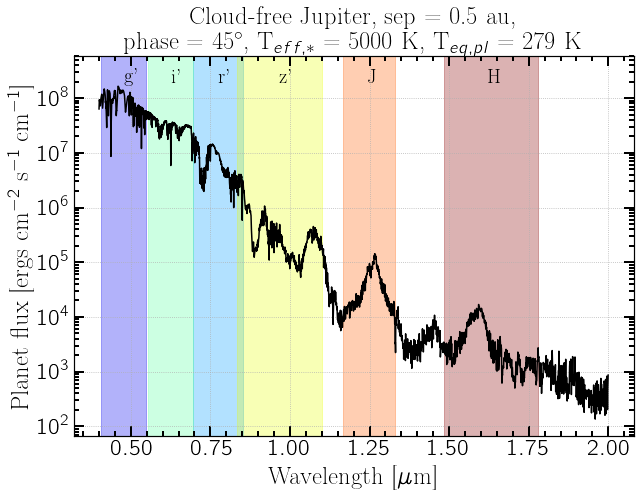

In [67]:
%matplotlib inline
plt.figure(figsize=(9,7))
plt.plot(spec['wavelength [um]'], spec['planet flux [ergs/cm2/s/cm]'], color='black', 
         label="")

import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')
cmap = matplotlib.cm.get_cmap('jet')

n = len(filters)
cs = np.linspace(0.1,0.99,n)
colors = cmap(cs)

breakpoint = 4
annotate_y = 2e8
alpha = 0.3
filter_labels=["g'","r'","i'","z'",'J','H']
for i,f in enumerate(filters[:breakpoint-1]):
    plt.axvspan(f.half_max_low*u.AA.to(u.um), f.half_max_high*u.AA.to(u.um), alpha = alpha,
               color=colors[i])
    print(f.fwhm*u.nm.to(u.um))
    plt.annotate(filter_labels[i], xy = (f.central_wavelength*u.AA.to(u.um),annotate_y), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
f = filters[breakpoint-1]
plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = alpha,
           color=colors[breakpoint-1])
plt.annotate(filter_labels[breakpoint-1], xy = (f.central_wavelength*u.nm.to(u.um),annotate_y), xytext = (0,0), 
             textcoords='offset points',color='black', fontsize=20)
for i,f in enumerate(filters[breakpoint:]):
    plt.axvspan(f.half_max_low, f.half_max_high, alpha = alpha,
               color=colors[i+breakpoint])
    plt.annotate(filter_labels[i+breakpoint], xy = (f.central_wavelength,annotate_y), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)

#plt.title(r'T$_{eq,pl}$ = 200 K, T$_{eff,*}$ = 6000 K, sep =  0.73 au')
plt.title('Cloud-free Jupiter, sep = 0.5 au, \n phase = 45$^{\circ}$, T$_{eff,*}$ = 5000 K, T$_{eq,pl}$ = 279 K',
         fontsize=25)
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.ylabel(r'Planet flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]', fontsize=25)
plt.gca().set_yscale('log')
plt.ylim(top=6e8)
plt.grid(ls=':')
#plt.legend(fontsize=20, loc='lower left')
plt.tight_layout()
plt.savefig('Planet-spectrum-example-singleJup.png')

1.4348997179500438
1.5648076644482272
1.3920675340413837


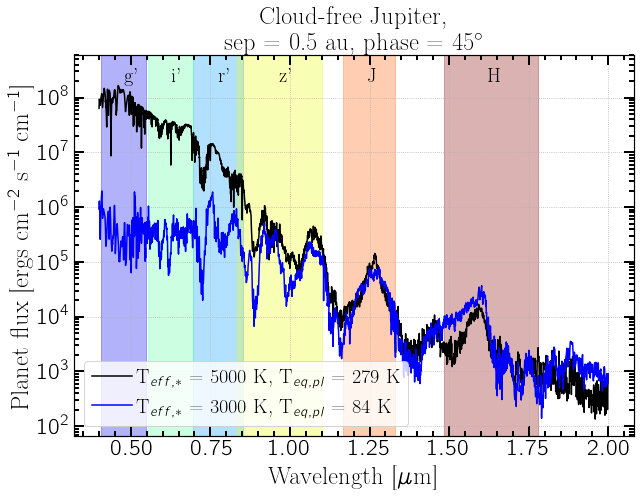

In [65]:
%matplotlib inline
plt.figure(figsize=(9,7))
plt.plot(spec['wavelength [um]'], spec['planet flux [ergs/cm2/s/cm]'], color='black', 
         label="T$_{eff,*}$ = 5000 K, T$_{eq,pl}$ = 279 K")
plt.plot(spec2['wavelength [um]'], spec2['planet flux [ergs/cm2/s/cm]'], color='blue',
         label="T$_{eff,*}$ = 3000 K, T$_{eq,pl}$ = 84 K")

import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')
cmap = matplotlib.cm.get_cmap('jet')

n = len(filters)
cs = np.linspace(0.1,0.99,n)
colors = cmap(cs)

breakpoint = 4
annotate_y = 2e8
alpha = 0.3
filter_labels=["g'","r'","i'","z'",'J','H']
for i,f in enumerate(filters[:breakpoint-1]):
    plt.axvspan(f.half_max_low*u.AA.to(u.um), f.half_max_high*u.AA.to(u.um), alpha = alpha,
               color=colors[i])
    print(f.fwhm*u.nm.to(u.um))
    plt.annotate(filter_labels[i], xy = (f.central_wavelength*u.AA.to(u.um),annotate_y), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
f = filters[breakpoint-1]
plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = alpha,
           color=colors[breakpoint-1])
plt.annotate(filter_labels[breakpoint-1], xy = (f.central_wavelength*u.nm.to(u.um),annotate_y), xytext = (0,0), 
             textcoords='offset points',color='black', fontsize=20)
for i,f in enumerate(filters[breakpoint:]):
    plt.axvspan(f.half_max_low, f.half_max_high, alpha = alpha,
               color=colors[i+breakpoint])
    plt.annotate(filter_labels[i+breakpoint], xy = (f.central_wavelength,annotate_y), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)

#plt.title(r'T$_{eq,pl}$ = 200 K, T$_{eff,*}$ = 6000 K, sep =  0.73 au')
plt.title('Cloud-free Jupiter,\n sep = 0.5 au, phase = 45$^{\circ}$',
         fontsize=25)
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.ylabel(r'Planet flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]', fontsize=25)
plt.gca().set_yscale('log')
plt.ylim(top=6e8)
plt.grid(ls=':')
plt.legend(fontsize=20, loc='lower left')
plt.tight_layout()
plt.savefig('Planet-spectrum-example-Jup-3000K-5000K.png')

In [55]:
directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
jup5000_45 = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)

directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Neptune-Tstar5000-Rstar0.8-Teq279-sep0.5-rad0.35-mass0.05-mh100-co1.5-phase45'
nep5000_45 = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)

directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Saturn-Tstar5000-Rstar0.8-Teq279-sep0.5-rad0.8-mass0.3-mh10-co0.5-phase45'
sat5000_45 = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)



1.4348997179500438
1.5648076644482272
1.3920675340413837


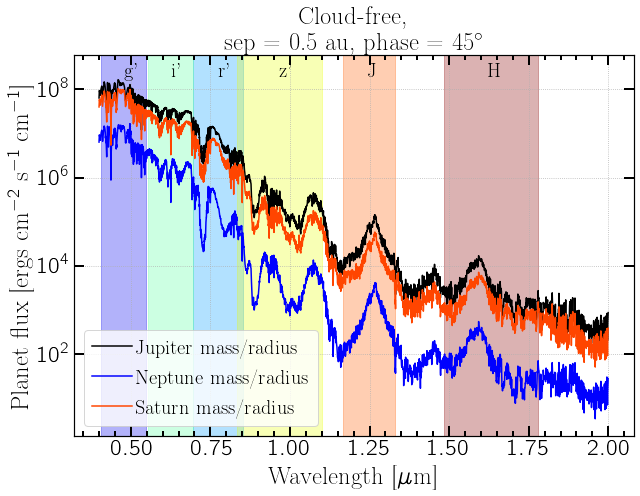

In [62]:
%matplotlib inline
plt.figure(figsize=(9,7))
plt.plot(jup5000_45['wavelength [um]'], jup5000_45['planet flux [ergs/cm2/s/cm]'], color='black', 
         label="Jupiter mass/radius")
plt.plot(nep5000_45['wavelength [um]'], nep5000_45['planet flux [ergs/cm2/s/cm]'], color='blue',
         label="Neptune mass/radius")
plt.plot(sat5000_45['wavelength [um]'], sat5000_45['planet flux [ergs/cm2/s/cm]'], color='orangered',
         label="Saturn mass/radius")

import matplotlib
cmap = matplotlib.cm.get_cmap('Paired')
cmap = matplotlib.cm.get_cmap('jet')

n = len(filters)
cs = np.linspace(0.1,0.99,n)
colors = cmap(cs)

breakpoint = 4
annotate_y = 2e8
alpha = 0.3
filter_labels=["g'","r'","i'","z'",'J','H']
for i,f in enumerate(filters[:breakpoint-1]):
    plt.axvspan(f.half_max_low*u.AA.to(u.um), f.half_max_high*u.AA.to(u.um), alpha = alpha,
               color=colors[i])
    print(f.fwhm*u.nm.to(u.um))
    plt.annotate(filter_labels[i], xy = (f.central_wavelength*u.AA.to(u.um),annotate_y), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
f = filters[breakpoint-1]
plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = alpha,
           color=colors[breakpoint-1])
plt.annotate(filter_labels[breakpoint-1], xy = (f.central_wavelength*u.nm.to(u.um),annotate_y), xytext = (0,0), 
             textcoords='offset points',color='black', fontsize=20)
for i,f in enumerate(filters[breakpoint:]):
    plt.axvspan(f.half_max_low, f.half_max_high, alpha = alpha,
               color=colors[i+breakpoint])
    plt.annotate(filter_labels[i+breakpoint], xy = (f.central_wavelength,annotate_y), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)

#plt.title(r'T$_{eq,pl}$ = 200 K, T$_{eff,*}$ = 6000 K, sep =  0.73 au')
plt.title('Cloud-free,\n sep = 0.5 au, phase = 45$^{\circ}$',
         fontsize=25)
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.ylabel(r'Planet flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]', fontsize=25)
plt.gca().set_yscale('log')
plt.ylim(top=6e8)
plt.grid(ls=':')
plt.legend(fontsize=20, loc='lower left')
plt.tight_layout()
plt.savefig('Planet-spectrum-example-JupNepSat.png')

In [ ]:
from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter
filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]

i = 2
plt.figure()
plt.plot(filters[i].wavelength,filters[i].transmission)
plt.axvline(x = filters[i].central_wavelength, color='purple', label='$\lambda_0$')
plt.axvline(x = filters[i].effective_wavelength,color='orange', label='$\lambda_\mathrm{eff}$')
plt.axvspan(xmin = filters[i].half_max_low, xmax = filters[i].half_max_high, alpha = 0.1, label='$\Delta \lambda$')
plt.axhline(y = filters[i].half_max, ls=':', color='grey', alpha = 0.5)
plt.legend(fontsize=16)
plt.ylabel('Transmission')
plt.xlabel('Wavelength [Ang]')
plt.savefig('filter-definitions.png',bbox_inches='tight')from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter
filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]

i = 2
plt.figure()
plt.plot(filters[i].wavelength,filters[i].transmission)
plt.axvline(x = filters[i].central_wavelength, color='purple', label='$\lambda_0$')
plt.axvline(x = filters[i].effective_wavelength,color='orange', label='$\lambda_\mathrm{eff}$')
plt.axvspan(xmin = filters[i].half_max_low, xmax = filters[i].half_max_high, alpha = 0.1, label='$\Delta \lambda$')
plt.axhline(y = filters[i].half_max, ls=':', color='grey', alpha = 0.5)
plt.legend(fontsize=16)
plt.ylabel('Transmission')
plt.xlabel('Wavelength [Ang]')
plt.savefig('filter-definitions.png',bbox_inches='tight')